NAME: VIVIAN KERUBO MOSOMI

EMAIL: kerubomosomi7@gmail.com

COUNTRY: Kenya

## PROBLEM STATEMENT

A private firm in US known as XYZ is interested in investing in the Cab industry.This is due to remarkable growth in the Cab Industry in last few years and multiple key players in the market.As per their Go-to-Market(G2M) strategy, they want to understand the market before taking final decision, so as to help them identify the right company to make their investment.

The following are the datasets provided:
1. Cab_Data.csv – Has details of transactions for 2 cab companies(Pink Cab and Yellow Cab)
2. Customer_ID.csv – Contains a unique identifier which links the customer’s demographic details eg Age, Gender and Income
3. Transaction_ID.csv – Contains transaction to customer mapping and payment mode of the customer
4. City.csv – Has details of list of US cities, their population and number of cab users

In [17]:
# Importing the libraries I need

import pandas as pd

# Plotly for visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**1. Cab Dataset**

In [18]:
# Loading the dataset and checking the first 20 rows

cab_data = pd.read_csv('Datasets/Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [19]:
# Checking the data types of each column

cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Steps to carry out:

Removing null values

Checking outliers in the columns

Identify and remove duplicates

In [20]:
# A look at null values

cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are no null values

In [21]:
# Creatign a function to check for outliers in the numerical columns of cab data

def check_outliers(dataset,column_name):
    return sns.boxplot(y=dataset[column_name])

<Axes: ylabel='KM Travelled'>

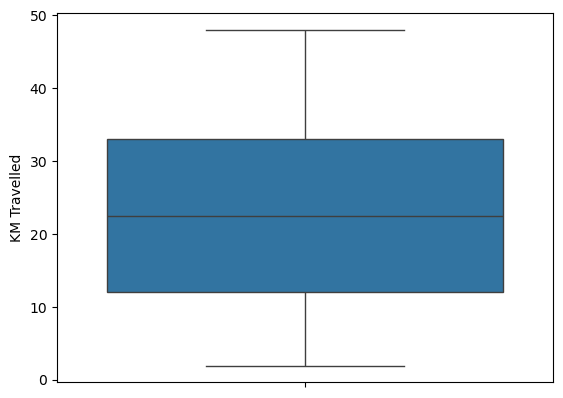

In [22]:
# Km Travelled

check_outliers(cab_data,'KM Travelled')

<Axes: ylabel='Price Charged'>

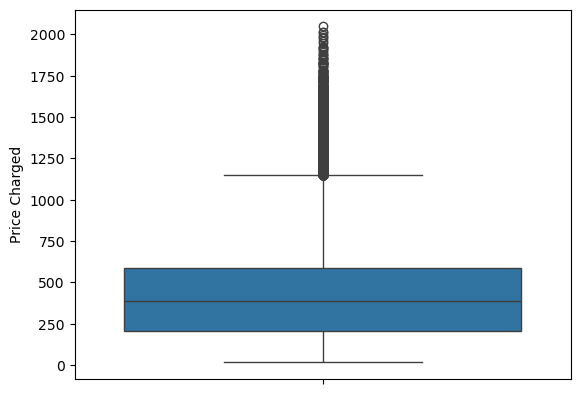

In [23]:
# Price charged

check_outliers(cab_data, 'Price Charged')

The price charged column from the above visualization has outliers

<Axes: ylabel='Cost of Trip'>

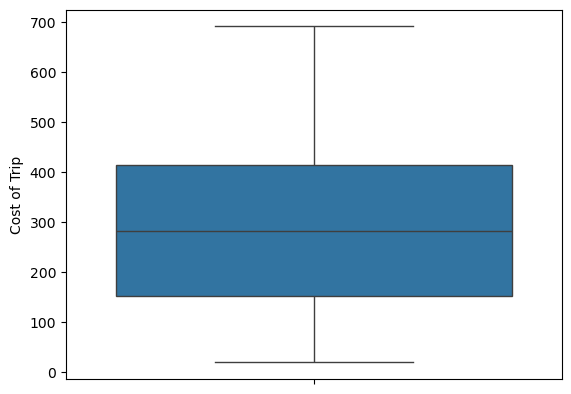

In [24]:
check_outliers(cab_data, 'Cost of Trip')

In [25]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1900-01-01', unit='D')

The above code converts the Date of Travel column from Excel serial date to datetime format for it to be usable

### 1. The trend of travel dates in each company to see which company gets freqeunt trips

In [26]:
# Grouping by the date and company ,and calculating the count of bookings for each unique combination of travel date and company
booking_trends = cab_data.groupby([cab_data['Date of Travel'].dt.date, 'Company']).size()

# Reseting to a dataframe and naming the column
booking_trends = booking_trends.reset_index(name='Booking Count')

# Visualization
px.line(booking_trends,
        x='Date of Travel',
        y='Booking Count',color='Company',
        title='Booking Frequency over time by Company',
        labels={'Booking Count':'Number of Bookings'},
        width=1000,height=450
       )

From the above line plot, we can see that Yellow Cab has more clients/bookings in a day compared to Pink Cab. 

### 2. Cities with the most cab users

In [27]:
city_data = pd.read_csv('Datasets/City.csv')
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [28]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [29]:
city_data.duplicated().sum()

0

For us to draw a pie chart, we have to convert the Users and Population column to numeric first and remove the commas which are non-numeric characters

In [30]:
# Creating a function to clean both the numeric and population columns

def population_users(dataset,column_name):
    dataset[column_name] = dataset[column_name].str.replace(' ','')
    dataset[column_name] = dataset[column_name].str.replace(',','')
    dataset[column_name] = dataset[column_name].astype(int)

    return dataset[column_name]

In [31]:
# For Users column

population_users(city_data,'Users')

0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int32

In [32]:
# For population column

population_users(city_data,'Population')

0     8405837
1     1955130
2     1595037
3     1339155
4     1177609
5     1030185
6      959307
7      943999
8      942908
9      814885
10     754233
11     698371
12     671238
13     631442
14     629591
15     545776
16     542085
17     418859
18     327225
19     248968
Name: Population, dtype: int32

In [33]:
fig = px.bar(city_data,
             x='City',
             y='Users',
             title='Cities with most Cab Users',width=1000,
             height=500)
fig.show()

The cab company(XYZ) should invest majorly in the top 5 cities which have the most cab users.They are 
* New York

* San Francisco

* Chicago

* Los Angeles

* Washington

* Boston

### 3.Correlation of Population of a city and cab users of the city

In [34]:
# Merging the datasets
merged_cab_city = pd.merge(cab_data,city_data,on='City',how='left')

numerical_columns = ['Transaction ID','KM Travelled','Price Charged','Cost of Trip','Population','Users']

# Correlation
correlation_matrix = merged_cab_city[numerical_columns].corr()

# Plotting a correlation chart
px.imshow(correlation_matrix,width=1000,height=600)

From the correlation plot, we can see that there's a very high positive correlation of 0.91 between Users and Population.

This communicates that:

#### The more the population a city has , the more the cab users

### 4. Which cab company is mostly used by users in each city?

In [35]:
# A bar chart

px.bar(merged_cab_city.groupby('Company')['Users'].count().reset_index(),x='Company',y='Users',title="Cab Company with Most Users",height=500)

### 5. Which company has a high profit margin?

In [36]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [37]:
# Profit
merged_cab_city['Profit'] = merged_cab_city['Price Charged'] - merged_cab_city['Cost of Trip']

In [38]:
# Profit margin
merged_cab_city['Profit Margin'] = (merged_cab_city['Profit']/merged_cab_city['Price Charged']) * 100

In [39]:
# Grouping Company by profit margin

company_profit_margin = merged_cab_city.groupby('Company')['Profit Margin'].mean().reset_index()
company_profit_margin

,Company,Profit Margin
0,Pink Cab,17.380833
1,Yellow Cab,30.134544


In [40]:
# Visualizing the above dataframe

px.bar(company_profit_margin,x='Company',y='Profit Margin',title='Company Profit Margin',labels=['Cab Company','Profit Margin'])

Yellow Cab has a higher profit margin compared to Pink Cab

### 6. Which city has higher profit margin?

In [41]:
city_profit_margin = merged_cab_city.groupby(['City','Company'])['Profit Margin'].mean().reset_index()
city_profit_margin

,City,Company,Profit Margin
0,ATLANTA GA,Pink Cab,15.654385
1,ATLANTA GA,Yellow Cab,28.514378
2,AUSTIN TX,Pink Cab,22.092708
3,AUSTIN TX,Yellow Cab,27.117879
4,BOSTON MA,Pink Cab,14.797256
5,BOSTON MA,Yellow Cab,15.362995
6,CHICAGO IL,Pink Cab,10.094514
7,CHICAGO IL,Yellow Cab,15.897690
8,DALLAS TX,Pink Cab,3.482165
9,DALLAS TX,Yellow Cab,37.774809


In [42]:
px.bar(city_profit_margin,x='City',y='Profit Margin',color='Company',title='Profit Margin for Each Company in Each City',width=1100,height=600)

Yellow Cab has a higher profit margin in all cities , the top most including:

* New York
* Silicon Valley
* Dallas TX

In [43]:
# import pandas as pd

# # Reshape data for bar chart
# bar_data = pd.melt(city_data, id_vars='City', value_vars=['Income (USD/Month)', 'Profit Margin'], 
#                    var_name='Metric', value_name='Value')

# fig = px.bar(bar_data, x='City', y='Value', color='Metric', barmode='group',
#              title='Average Customer Income vs. Profit Margin by City')
# fig.show()


## Merging cab city with the remaining tables which are Transaction_ID.csv and Customer_ID.csv

In [44]:
merged_cab_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit Margin
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.3150,15.450869
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.6660,6.601026
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,27.5680,22.019169
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,25.7980,6.835718
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,16.8440,14.695516
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,5.8800,8.492201
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,6.9020,6.067692
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,87.4200,20.001373
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,32.1420,21.986456


In [45]:
# Loading the customer data

customer_data = pd.read_csv('Datasets/Customer_ID.csv')
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [46]:
# Loading transaction data

transaction_data = pd.read_csv('Datasets/Transaction_ID.csv')
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [47]:
combined_data = pd.merge(pd.merge(merged_cab_city,transaction_data,how="left",on="Transaction ID"),customer_data,how="left",on="Customer ID")
combined_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.3150,15.450869,29290,Card,Male,28,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.6660,6.601026,27703,Card,Male,27,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,27.5680,22.019169,28712,Cash,Male,53,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,25.7980,6.835718,28020,Cash,Male,23,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,16.8440,14.695516,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,5.8800,8.492201,52392,Cash,Male,24,15651
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,6.9020,6.067692,53286,Cash,Male,32,6528
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,87.4200,20.001373,52265,Cash,Male,56,7966
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,32.1420,21.986456,52175,Card,Male,32,6423


### 7. Are most cab users male or female in all cities?

In [48]:
# Getting the male and female count
combined_data['Gender'].value_counts()

# Grouping users by both city and gender and counting the users
gender_counts = combined_data.groupby(['City', 'Gender'])['Users'].count().unstack(fill_value=0)

gender_counts

Gender,Female,Male
City,,
ATLANTA GA,3724,3833
AUSTIN TX,2397,2499
BOSTON MA,13163,16529
CHICAGO IL,21988,34637
DALLAS TX,3366,3651
DENVER CO,1850,1975
LOS ANGELES CA,20789,27244
MIAMI FL,3217,3237
NASHVILLE TN,1430,1580


In [49]:
gender_counts.columns

Index(['Female', 'Male'], dtype='object', name='Gender')

From just a random look of the above, most cab users in the city are Male.Now let's plot a visualization to view the same.
We have 2 columns, male and female which will be tricky to use if we want to use a bar chart so let's melt the dataframe

In [50]:
gender_counts.reset_index()

Gender,City,Female,Male
0,ATLANTA GA,3724,3833
1,AUSTIN TX,2397,2499
2,BOSTON MA,13163,16529
3,CHICAGO IL,21988,34637
4,DALLAS TX,3366,3651
5,DENVER CO,1850,1975
6,LOS ANGELES CA,20789,27244
7,MIAMI FL,3217,3237
8,NASHVILLE TN,1430,1580
9,NEW YORK NY,39551,60334


In [51]:
# Melt the dataframe to have gender and count columns for easier plotting

gender_counts_melted = gender_counts

In [52]:
# Melt the DataFrame to have 'Gender' and 'Count' columns for easier plotting
gender_counts_melted = gender_counts.reset_index().melt(id_vars='City',value_vars=['Male', 'Female'],var_name='Gender', value_name='Count')

# Creating the bar chart
px.bar(gender_counts_melted, x='City', y='Count', color='Gender',title='Cab Users by Gender in Each City', barmode='group',height=500,width=1000)

From the above, we can observe that most of the cities have most cab users being Male.
This may be because of safety concerns on females using cabs.They can partner with yellow cab which is popular in most cities to create promotions specifically aimed at female users, such as discounts for first-time female riders or incentives for referrals within female networks.

In [53]:
combined_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.3150,15.450869,29290,Card,Male,28,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.6660,6.601026,27703,Card,Male,27,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,27.5680,22.019169,28712,Cash,Male,53,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,25.7980,6.835718,28020,Cash,Male,23,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,16.8440,14.695516,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,5.8800,8.492201,52392,Cash,Male,24,15651
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,6.9020,6.067692,53286,Cash,Male,32,6528
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,87.4200,20.001373,52265,Cash,Male,56,7966
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,32.1420,21.986456,52175,Card,Male,32,6423


### 8. Spotting the Target Market in terms of Age

In [54]:
# Creating bins for ages to enable easy analysis

In [55]:
print(combined_data['Age'].min())
print(combined_data['Age'].max())

18
65


In [56]:
combined_data['Age'].value_counts()

Age
23    12327
20    12229
27    12030
25    11973
32    11959
34    11825
39    11798
22    11796
26    11655
19    11591
40    11536
33    11457
21    11431
30    11165
28    11163
24    11151
37    11086
36    11054
31    10930
38    10906
18    10846
29    10675
35    10555
61     4361
45     4248
49     4158
58     4107
50     4089
47     4087
59     4068
42     3970
51     3931
46     3918
64     3908
41     3852
43     3823
54     3810
52     3784
60     3775
56     3742
63     3733
44     3725
48     3700
53     3641
62     3530
57     3473
55     3442
65     3379
Name: count, dtype: int64

In [57]:
combined_data['Age'] = pd.to_numeric(combined_data['Age'])
combined_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.3150,15.450869,29290,Card,Male,28,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.6660,6.601026,27703,Card,Male,27,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,27.5680,22.019169,28712,Cash,Male,53,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,25.7980,6.835718,28020,Cash,Male,23,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,16.8440,14.695516,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,5.8800,8.492201,52392,Cash,Male,24,15651
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,6.9020,6.067692,53286,Cash,Male,32,6528
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,87.4200,20.001373,52265,Cash,Male,56,7966
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,32.1420,21.986456,52175,Card,Male,32,6423


In [58]:
# Creating age bins
bins = [17,24,34,44,54,65]

# Minimum age to include is 18
labels = ['18-24','25-34','35-44','45-54','55+']

# Teenagers and Young Adults (18–24)
# Young Adults (25–34)
# Middle-Aged Adults (35–44)
# Older Adults (45–54)
# Senior Adults (55+)

# Adding a new column for age groups
combined_data['Age'] = pd.cut(combined_data['Age'], bins=bins, labels=labels, right=True)

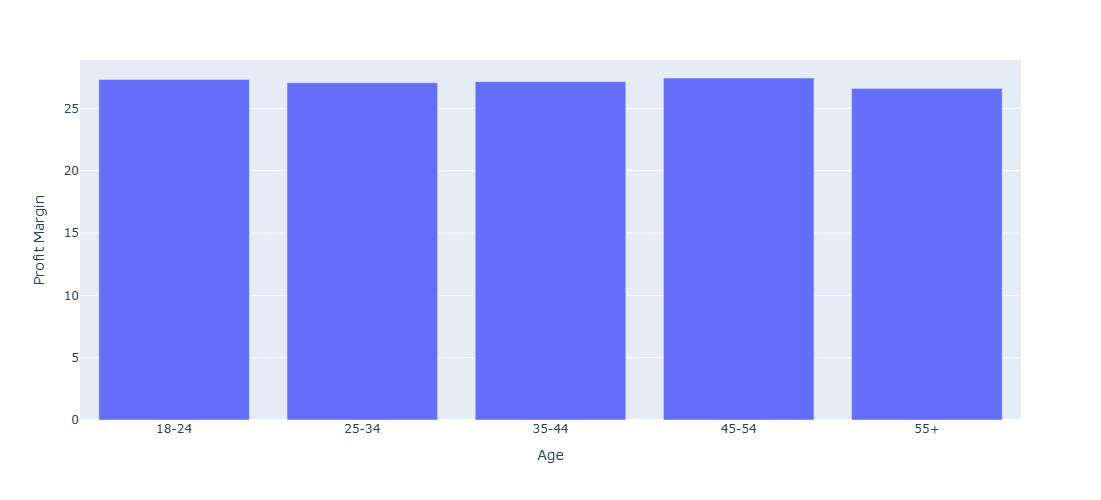

In [59]:
px.bar(combined_data.groupby('Age')['Profit Margin'].mean().reset_index(),x='Age',y='Profit Margin',width=800,height=500)

In [60]:
combined_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.3150,15.450869,29290,Card,Male,25-34,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.6660,6.601026,27703,Card,Male,25-34,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,27.5680,22.019169,28712,Cash,Male,45-54,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,25.7980,6.835718,28020,Cash,Male,18-24,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,16.8440,14.695516,27182,Card,Male,25-34,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,5.8800,8.492201,52392,Cash,Male,18-24,15651
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,6.9020,6.067692,53286,Cash,Male,25-34,6528
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,87.4200,20.001373,52265,Cash,Male,55+,7966
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,32.1420,21.986456,52175,Card,Male,25-34,6423


The difference is very minute but people of the ages [18-24] and [45-54] use cabs more.They should invest mostly in those ages

In [61]:
combined_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit Margin,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.3150,15.450869,29290,Card,Male,25-34,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.6660,6.601026,27703,Card,Male,25-34,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,27.5680,22.019169,28712,Cash,Male,45-54,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,25.7980,6.835718,28020,Cash,Male,18-24,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,16.8440,14.695516,27182,Card,Male,25-34,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,5.8800,8.492201,52392,Cash,Male,18-24,15651
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,6.9020,6.067692,53286,Cash,Male,25-34,6528
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,87.4200,20.001373,52265,Cash,Male,55+,7966
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,32.1420,21.986456,52175,Card,Male,25-34,6423


## Observations and Recommendations from the above visualizations

1. Yellow Cab receives more bookings in a day compared to Pink Cab
2. Cities such as New York, San Francisco, Chicago, LA, Washington, Boston as they have more users.Hence XYZ should put a priority to those cities in regards to investment
3. There's a high correlation between users and population. So XYZ should focus on the cities that a have a large population.
4. Yellow Cab has most users, appoximately 274k from the analysis, compared to Pink Cab which has 84k
5. Yellow Cab has a higher profit margin compared to Pink Cab
6. XYZ should major on cities like Silicon Valley, NeW York and Dallas which have higher profit margins
7.  Most of the cities have most cab users being Male.They can partner with yellow cab which is popular in most cities to create promotions specifically aimed at female users, such as discounts for first-time female riders or incentives for referrals within female networks.
8.  They should invest more in  ages [18-24] and [45-54] as they use cabs more.

## Final Take: 
## XYZ should invest in Yellow Cab as they prove to be popular in most cities, have most users and they make the most profits